In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("casas.csv")
X = data["Terreno (m2)"]
y = data["Precio (MDP)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

X_test

2    381.0
8    708.0
4    431.0
Name: Terreno (m2), dtype: float64

In [4]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
def errorc(y_test: np.ndarray, y_pred: np.ndarray):
    error = sum(abs(pred - valor_real) for pred, valor_real in zip(y_pred, y_test))
    return error

In [71]:
w = [0, 0, 0, 0, 0]
mseall = []
alpha = 0.00000007
num_iters = 4

y_pred = [[],[],[],[],[]]
y_pred_test = [[],[],[],[],[]]
y_temp_test = []
mse = 0
print('y_test \n',y_test)
for i in range(num_iters):
    total = 0
    for j in X_train.index:
        y_pred[i].append((w[i] * X_train[j]))
        total +=  ((w[i] * X_train[j]) - y_train[j]) * X_train[j]
    w[i] = w[i] - ((2*alpha) * total)
    if(i<4): w[i+1] = w[i]
    print("Peso", w[i])
    y_pred_test[i].append(w[i] * X_test)
    y_temp_test.append(w[i] * X_test)
    error = np.sum(np.abs(y_temp_test[i] - y_test))
    mseall.append(error)
    print("Error de estimacion: ", error)
    print("Predicho\n", y_pred_test[i])

y_test 
 2    0.88
8    1.63
4    0.99
Name: Precio (MDP), dtype: float64
Peso 0.0008143827999999999
Error de estimacion:  2.262138144
Predicho
 [2    0.310280
8    0.576583
4    0.350999
Name: Terreno (m2), dtype: float64]
Peso 0.00134054665030748
Error de estimacion:  1.4623690915326304
Predicho
 [2    0.510748
8    0.949107
4    0.577776
Name: Terreno (m2), dtype: float64]
Peso 0.0016804953788051745
Error de estimacion:  0.9456470242161347
Predicho
 [2    0.640269
8    1.189791
4    0.724294
Name: Terreno (m2), dtype: float64]
Peso 0.0019001325468463942
Error de estimacion:  0.6117985287934806
Predicho
 [2    0.723951
8    1.345294
4    0.818957
Name: Terreno (m2), dtype: float64]


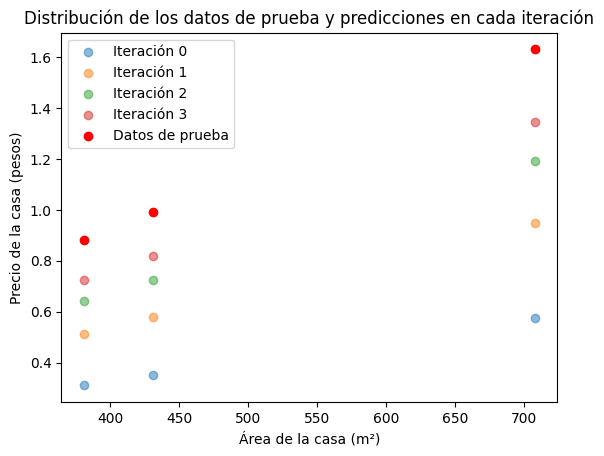

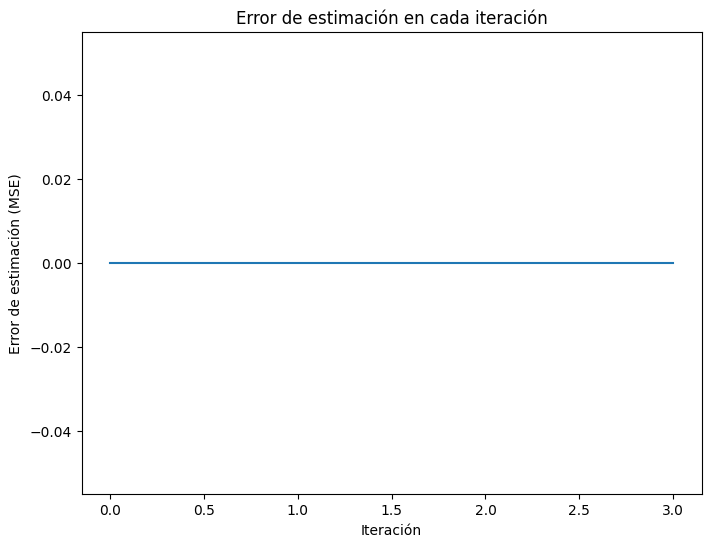

Error de estimación (σ²): [0, 0, 0, 0]


In [66]:
for i in  range(num_iters):
        plt.scatter(X_test, y_pred_test[i], alpha=0.5, label=f"Iteración {i}")
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.xlabel('Área de la casa (m²)')
plt.ylabel('Precio de la casa (pesos)')
plt.title('Distribución de los datos de prueba y predicciones en cada iteración')
plt.legend()
plt.show()

# Gráfica 2: Error de estimación en cada iteración
plt.figure(figsize=(8, 6))
plt.plot(mseall)
plt.xlabel('Iteración')
plt.ylabel('Error de estimación (MSE)')
plt.title('Error de estimación en cada iteración')
plt.show()

# Imprimir el error de estimación final
print(f"Error de estimación (σ²): {mseall}")